### plots from LOE paper


the plots displayed in this file are used to compare the results of the experiments to the results stated in the 
original paper

- lineplots
- heatmap for sensitivity analysis


In [1]:
#activate conda env AutencoderTF env tf '2.10.0' , python 3.9.16
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

print(sys.path)
sys.path.append('/root/LatentOE-AD')
from Additional_Code_BULE.loe_utils.plots_from_paper_functions import *


folderpath='/root/LatentOE-AD/RESULTS/fmnist/'


['/root/LatentOE-AD/Additional_Code_BULE', '/root/LatentOE-AD/Additional_Code_BULE/c', '/root/LatentOE-AD/Additional_Code_BULE/\\\\Users\\\\buehl\\\\git\\\\projects\\\\LatentOE-AD', '/root/anaconda3/envs/AutencoderTF/lib/python39.zip', '/root/anaconda3/envs/AutencoderTF/lib/python3.9', '/root/anaconda3/envs/AutencoderTF/lib/python3.9/lib-dynload', '', '/root/anaconda3/envs/AutencoderTF/lib/python3.9/site-packages']


/root/anaconda3/envs/AutencoderTF/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


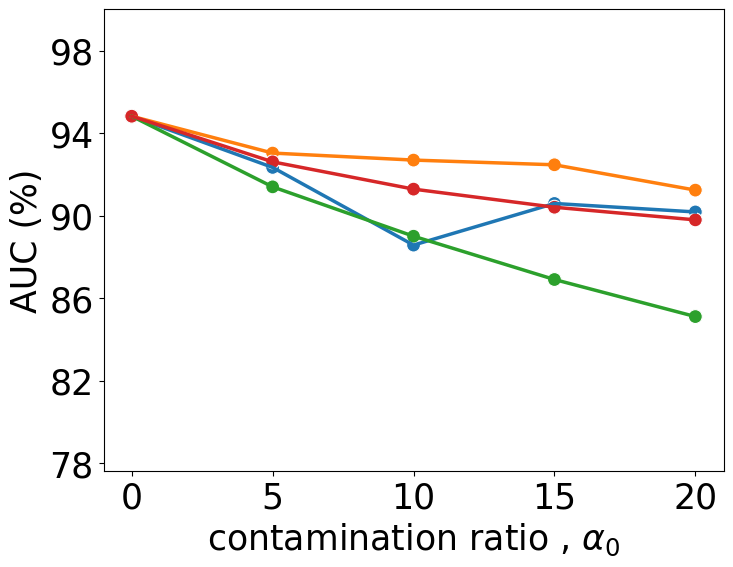

In [42]:
def plot_lineplots(df:pd.DataFrame)->None:
    """
    This function plots the results of the dataframe
    param df: dataframe with the strucutre of pd.DataFrame({'auc':auc_list,'contam':contam_list,'model':modelnames})
    """

    plt.figure(figsize=(8, 6))
    contam_list= list(set(df['contam']))
    sns.lineplot(data=df, x="contam", y="auc", hue="model", linewidth=2.5, legend=False)
    sns.scatterplot(data=df, x="contam", y="auc", hue="model", marker="o", legend=False,s=100)
    #plt.legend(loc='lower left', fontsize=16)
    plt.yticks(np.arange(78, 100, step=4),fontsize=25)
    plt.ylim([77.6, 100])
    plt.xlabel(r'contamination ratio , $\alpha_{0}$', fontsize=25)
    plt.ylabel(r'AUC (%)', fontsize=25)
    #plt.title()#f'FMNIST, AUROC for different contamination ratios ', fontsize=25
    plt.xticks(contam_list,fontsize=25)
    plt.show()

# loe_hard_no are the models where the loss gets the contamination ratio from the dataset

loss_list=['loe_hard_no','loe_soft_no','blind','refine_no']
#loss_list=['loe_hard','loe_soft','blind']


contam_list=[0.0,0.05,0.1,0.15,0.2]
assumed_contamination=0.0

df=get_dataframe_from_results(contam_list,folderpath,loss_list,assumed_contamination)

df['contam']=df['contam']*100
df['auc']=df['auc']*100

plot_lineplots(df)

In [25]:
df

,auc,contam,model
0,92.339837,5.0,loe_hard_no
1,94.822273,0.0,loe_hard_no
2,90.591480,15.0,loe_hard_no
3,88.573833,10.0,loe_hard_no
4,90.180473,20.0,loe_hard_no
0,93.035269,5.0,loe_soft_no
1,94.822273,0.0,loe_soft_no
2,92.467108,15.0,loe_soft_no
3,92.695178,10.0,loe_soft_no
4,91.238969,20.0,loe_soft_no


/root/LatentOE-AD/Additional_Code_BULE/loe_utils/plots_from_paper_functions.py:122: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = df.pivot('alpha0','alpha',  'auc')


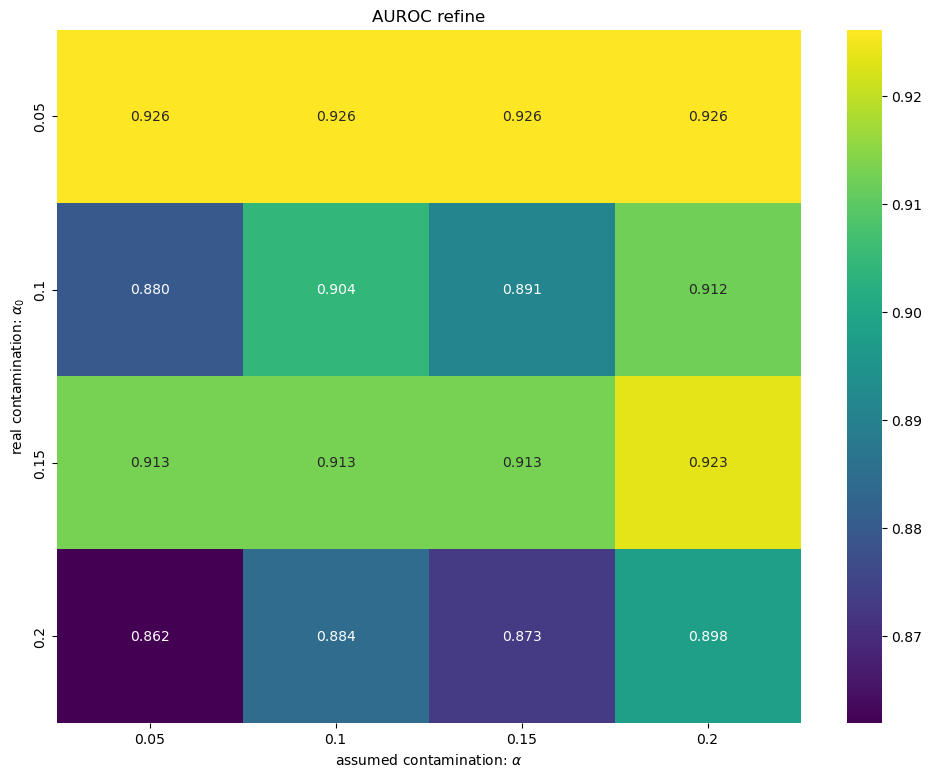

In [9]:
model='refine'
contlist=np.arange(0.0, 0.45, 0.1)# for which contamination ratios we want to see the results
contlist=[0.05,0.1,0.15,0.2]
df=get_heatmap_df(folderpath,model,contlist)
plot_heatmap(df,title=f'AUROC {model}')
